# CS181/DA210 Final Project
# Exploring the Box Office Charts
## Part One: Data Acquisition
## By Ichhit Joshi



---

In [14]:
#importing required libraries

import os
import io
import sys
import importlib
import pandas as pd
from lxml import etree
import util
importlib.reload(util)

#setting the directory where the html data files are stored
datadir = 'data'

## Introduction to the Data Set:
### The Numbers Box Office Data

The Numbers is a film industry data website that tracks box office revenue in a systematic, algorithmic way. The company also conducts research services and forecasts incomes of film projects. Their website has tabular movie report data for all the top 100 highest grossing movies of every year starting from 1995 to 2022 (present). <br>

This project is only about the box office performance of movies in theaters and doesn’t include any streaming / home-DVD revenues. <br>

I will be fetching yearly data from the years 1995 to 2022, which will equal 28 tables of 100 rows each (data sets), which can be combined into one huge dataset with 2800 rows. <br>

Database Source: <br>
https://www.the-numbers.com  <br>

© 1997-2022 Nash Information Services, LLC. <br>

Every top 100 highest grossing movies data can be generated using their website: <br>
https://www.the-numbers.com/movies/report-builder <br>

One has the option to choose what columns to retrieve for the tables. So, I've chosen some columns that I'll be using in the project.

### How to get yearly data ?

For example, I can get the top 100 highest grossing movies of 2022 data using this URL: <br>

https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2022/2022/None/None/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&show-release-year=On&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-inflation-adjusted-domestic-box-office=On&show-international-box-office=On&show-worldwide-box-office=On&show-theatrical-distributor=On&show-genre=On&show-source=On&show-production-method=On&show-creative-type=On

The URL includes the columns that will be included in the table. The above URL would result in a website that has generated data for the year 2022. <br>

To get data of any other specific year, I can use the above link but just change the value of year in the URL in the section: “All/None/None/<b>2022/2022</b>/None/None/”. <br>


## Central Questions:
How have the box office revenues of movies changed over the years from 1995 to 2022? What is the most profitable genre of movie to produce? What are the top 10 most expensive movies ever made from 1995 to 2022? What are the top 10 all-time highest grossing movies and what were their profits? Which theater distributor has made the most profit over the years? 

Finally, one last question I would like to answer is: <br>For every distributor, which movie hit the maximum profit out of all their distributed movies? What year did it happen and how much was the profit?

### Why is this data and problem interesting?

Movie theaters have always been the major source of entertainment for millions of people across the globe and it's also the core source of income for the production companies that produce the movies. Production companies, being profit-oriented, will always try to maximize the profits they can earn from the box office. <br>

Now, with the rise of streaming services, it is interesting to see if there has been any decline of box office revenues in recent years. Are people still going to the theaters to watch movies? Such question can be answered if we had all the revenue data over the years. This is one of the major goals of this project. <br>

The Numbers website, which is the data source for this project, has all the production budget allocated by the production companies and the box office revenue earned domestically and globally for the top 100 highest grossing movies from 1995 to 2022. <br>

One of the interesting questions that I'm looking forward to answering through this project is knowing what are the top 10 movies all-time that have made the most amount of profit.  <br>

This data has a lot of potential. Are superhero and fictional movies making the most profit in the box office? Looking at the correlation between genre and profit can be helpful for production companies. If there is any significant proof that a specific genre can make the most money, this would help companies to focus on what type of content to create for the audience. <br>

We can also see if any specific distribution/production companies like Universal Studios or Walt Disney have dominated the box office charts over the years.  <br>

Overall, I think this data can be really useful for the production companies to help make decisions on maximizing their profits. <br>

### Is this data source eligible for scraping?

The following link contains the terms of service for the numbers website (data source) : <br>
https://www.the-numbers.com/data-services <br>

<b>These are the terms they've included: </b><br>

We permit <b>hand-copying</b> data from The Numbers for personal and academic use. <br>
In instances of automated scraping, users will be blocked and investigated. <br>

They say that they allow hand-copying data from the website for personal and academic use. This project is strictly for academic use and I will not be using it to make money. In this case, what they mean by hand-copying doesn't seem specific enough. Obviously, making automated https requests from python to their website is strictly against their policy. However, I have used a solution that seems to be in a gray-area. <br>

I've manually downloaded all of the 27 website data to html files and I've scraped their website offline. So, technically, I can argue that this could a form of hand-copying? And I also haven't violated their policy as I haven't made any automated https requests to their website.


### How I accessed and scraped the data?

As per the data source's policy, I couldn't access and scrape the data directly/automatically from their website. So, I manually downloaded the required website data from 1995 to 2022 as offline html files. So, I will be getting the tabular data by scraping the html files offline. <br>

All of the year data have been downloaded as "{year}.html". So, their filename ranges from "1995.html" to "2022.html".

The following collection of code and markdown cells will guide us through the whole data accessing and scraping process to get our final dataset.

---

First, we will try reading one of the HTML files. Here, we use etree to parse the 2022 html file:

In [15]:
path = os.path.join(datadir, "2022.html")
htmlparser =  etree.HTMLParser()
movies_root = etree.parse(path,htmlparser).getroot()

After observing the HTML, I have found the xpath string to get the table tag that has all the required rows and columns:

In [16]:
table_root = movies_root.xpath("/html/body/div/div[position() = 3]/div[position() = 1]/div[position () = 4]/center/table")[0]

util.print_xml(table_root, depth=3, nchild=4)

<table>
  <thead>
    <tr>
      <th></th>
      <th>Released</th>
      <th>Released</th>
      <th>Title</th>
       ...
    </tr>
  </thead>
  <tbody>
    <tr class='highlight'>
      <td class='data'>1</td>
      <td class='data'>May 27, 2022</td>
      <td class='data'>2022</td>
      <td>
      </td>
       ...
    </tr>
    <tr class='highlight'>
      <td class='data'>2</td>
      <td class='data'>May 6, 2022</td>
      <td class='data'>2022</td>
      <td>
      </td>
       ...
    </tr>
    <tr class='highlight'>
      <td class='data'>3</td>
      <td class='data'>Jun 10, 2022</td>
      <td class='data'>2022</td>
      <td>
      </td>
       ...
    </tr>
    <tr class='highlight'>
      <td class='data'>4</td>
      <td class='data'>Mar 1, 2022</td>
      <td class='data'>2022</td>
      <td>
      </td>
       ...
    </tr>
     ...
  </tbody>
</table>


The above HTML format print, provides us with an overview of the HTML sequence under the table tag that we will be scraping. This visualization is really helpful when later we have to individually scrape the columns.


First, let's try seeing what the headers are gonna be for the columns. This following code uses xpath inside a for loop to get every header one by one instead of just 1 xpath to get all the headers. <br>

#### Issue: 
When I tried using just 1 xpath to get all the headers at once, I got a list that contained, for instance:
'Domestic' and 'Box Office' separate as headers. They should be the header name for 1 column. It was because in the HTML file, their was a line break between 'Domestic' and 'Box Office'. So, using a for loop to get every column header one by one fixed the issue. I just concatenated the header if there was a line break and then finally appended it to the list of headers.

In [17]:
def get_column_headers(table_root):

    cols = len(table_root.xpath("./thead/tr/th"))
    headers = []
    for i in range(1,cols+1):
        path = "./thead/tr/th[position() = {}]/text()"
        col_name = table_root.xpath(path.format(i))
        header = ""
        for item in col_name:
            header = header + item
            header += " "

        headers.append(header[:-1])
    
    return headers

get_column_headers(table_root)

['\xa0',
 'Released',
 'Released',
 'Title',
 'Theatrical Distributor',
 'Genre',
 'Source',
 'Production Method',
 'Creative Type',
 'Production Budget',
 'Domestic Box Office',
 'Infl. Adj. Dom. Box Office',
 'International Box Office',
 'Worldwide Box Office']

We can see what the column headers are gonna be above. <br>

### Helper Functions for retrieving table columns

Now, we create helper functions that given a table root returns a list of the column data.

In [18]:
def get_rankings(table_root):
    return list(map(int,table_root.xpath("./tbody/tr/td[position() = 1]/text()")))

def get_release_date(table_root):
    return table_root.xpath("./tbody/tr/td[position() = 2]/text()")

def get_title(table_root):
    titleList = []
    
    for row in table_root[1]:
        for item in row[3]:
            titleList.append(item[0].text)
      
    return titleList
    
def get_distributor(table_root):
    distributorList = []
    
    for row in table_root[1]:
        for item in row[4]:
            if(item.text != None):
                distributorList.append(item.text)
            else:
                distributorList.append("N/A")
    
    return distributorList

#### Issue
For the distributor column, I had to take procedural approach instead of using xpath as their were some rows with blank values. Using xpath would've resulted in a list of for instance, 98 elements instead of the usual 100 rows of movies, if 2 movies out of the 100 had blank value for the distributor. So, I check if the row value was None and I added an N/A for the missing values. <br>

Then, here's the rest of the helper functions for the remaining columns:

In [19]:
def get_genre(table_root):
    return table_root.xpath("./tbody/tr/td[position() = 6]/a/text()")

def get_source(table_root):
    sourceList = []
    
    for row in table_root[1]:
        for item in row[6]:
            if(item.text != None):
                sourceList.append(item.text)
            else:
                sourceList.append("N/A")
    
    return sourceList

def get_production_method(table_root):
    return table_root.xpath("./tbody/tr/td[position() = 8]/a/text()")

def get_creative_type(table_root):
    return table_root.xpath("./tbody/tr/td[position() = 9]/a/text()")
    
def get_production_budget(table_root):
    temp = [int(item[1:].replace(',','')) for item in table_root.xpath("./tbody/tr/td[position() = 10]/text()")]
    return temp

def get_domestic_box_office(table_root):
    temp = [int(item[1:].replace(',','')) for item in table_root.xpath("./tbody/tr/td[position() = 11]/text()")]
    return temp

def get_infl_adj_domestic_box_office(table_root):
    temp = [int(item[1:].replace(',','')) for item in table_root.xpath("./tbody/tr/td[position() = 12]/text()")]
    return temp

def get_international_box_office(table_root):
    temp = [int(item[1:].replace(',','')) for item in table_root.xpath("./tbody/tr/td[position() = 13]/text()")]
    return temp

def get_worldwide_box_office(table_root):
    temp = [int(item[1:].replace(',','')) for item in table_root.xpath("./tbody/tr/td[position() = 14]/text()")]
    return temp

For the revenue values, I converted them into integers and removed the commas between the numbers as later on for the analyis part, we will be doing mathematical operations on the figures and I thought doing this early on would make work easier.<br>

Given a filename for the HTML files, the following function parses the HTML file, creates a Dictionary of Lists and returns it.

In [20]:
def createDoLFromHTML(filename):
    path = os.path.join(datadir, filename)
    htmlparser =  etree.HTMLParser()
    movies_root = etree.parse(path,htmlparser).getroot()
    table_root = movies_root.xpath("/html/body/div/div[position() = 3]/div[position() = 1]/div[position () = 4]/center/table")[0]

    col_headers = get_column_headers(table_root)
    DoL = {'Rank' : get_rankings(table_root),
           'Release Date' : get_release_date(table_root),
           'Title' : get_title(table_root),
           'Distributor' : get_distributor(table_root),
           'Genre' : get_genre(table_root),
           'Source' : get_source(table_root),
           'Production Method' : get_production_method(table_root),
           'Creative Type' : get_creative_type(table_root) ,
           'Production Budget' : get_production_budget(table_root),
           'Domestic Box Office' : get_domestic_box_office(table_root),
           'Inflation Adjusted Domestic Box Office' : get_infl_adj_domestic_box_office(table_root),
           'International Box Office' : get_international_box_office(table_root),
           'Worldwide Box Office' : get_worldwide_box_office(table_root)
    }

    return DoL

### Reading our first table:

We will try converting the 1995 year data from html into a pandas dataframe using all of the above functions.

In [21]:
first_data = pd.DataFrame(createDoLFromHTML("1995.html"))
first_data.head()

,Rank,Release Date,Title,Distributor,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office
0,1,"Nov 22, 1995",Toy Story,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,30000000,192523233,403493031,172747718,365270951
1,2,"Jun 16, 1995",Batman Forever,Warner Bros.,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,100000000,184031112,387946038,152498032,336529144
2,3,"Jun 30, 1995",Apollo 13,Universal,Drama,Based on Factual Book/Article,Live Action,Dramatization,65000000,173772767,365379356,162029504,335802271
3,4,"Jun 10, 1995",Pocahontas,Walt Disney,Adventure,Based on Real Life Events,Hand Animation,Historical Fiction,55000000,141579773,298455715,205520227,347100000
4,5,"Nov 10, 1995",Ace Ventura: When Nature Calls,Warner Bros.,Comedy,Original Screenplay,Live Action,Contemporary Fiction,30000000,108360063,228294825,104039937,212400000


We have successfully generated a DataFrame for the 1995 top 100 highest grossing movies. <br>


<b>These are the columns of our dataset:</b>
 
<b>Rank:</b><br>
Data Type: int

Rank of the movie ranging from 1 to 100 based on highest revenue to lowest revenue

<b>Release Year:</b><br>
Data Type: int

Ranges from 1995 to 2022
It is the year the movie was released in the domestic market.

<b>Release Date:</b><br>
Data Type: string

Ranges from “January 1, 1995” to “December 31, 2022”
It is the date when the movie was released in the domestic market.

<b>Movie Title:</b><br>
Data Type: string

Official name of the movie released in the theaters

<b>Theatrical Distributor</b><br>
Data Type: string

Company responsible for the marketing of a film. The distribution company may be the same with, or different from, the production company. For example, Sony Pictures is a Theatrical Distributor.

<b>Genre:</b><br>
Data Type: string (categorical)

Stylistic categories where a particular movie can be placed based on the setting, characters, plot, mood, tone, and theme.

<i>Can be one of the following: </i>

Adventure

Action

Drama

Comedy

Thriller/Suspense

Horror

Romantic Comedy

Musical

Documentary

Black Comedy

Western

Concert/Performance

Multiple Genres

Reality

Educational

<b>Source:</b><br>
Data Type: string (categorical)

Source from which the plot of the movie is based on.

<i>Can be one of the following:</i>

Original Screenplay<br>
Based on Fiction Book/Short Story<br>
Based on Comic/Graphic Novel<br>
Remake<br>
Based on Real Life Events<br>
Based on TV<br>
Based on Factual Book/Article<br>
Spin-Off<br>
Based on Folk Tale/Legend/Fairytale<br>
Based on Game<br>
Based on Play<br>
Based on Theme Park Ride<br>
Based on Toy<br>
Based on Religious Text<br>
Based on Short Film<br>
Based on Musical or Opera<br>
Based on Movie<br>
Compilation<br>
Based on Song<br>
Based on Musical Group<br>
Based on Web Series	<br>
Based on Ballet<br>
Based on Radio<br>

<b>Production Method:</b><br>
Data Type: string (categorical)

The method by which the movie is made. For example, if using humans as actors, then the production method is live action.

<i>Can be one of the following:</i>

Live Action<br>
Animation/Live Action<br>
Digital Animation<br>
Hand Animation<br>
Stop-Motion Animation<br>
Multiple Production Methods<br>
Rotoscoping<br>


<b>Creative Type:</b><br>
Data Type: string (categorical)

Categories where a movie can be placed. (similar to genre but descriptive in a different way)

<i>Can be one of the following:</i>

Contemporary Fiction<br>
Kids Fiction<br>
Science Fiction<br>
Super Hero<br>
Fantasy<br>
Historical Fiction<br>
Dramatization<br>
Factual<br>
Multiple Creative Types<br>

<b>Production Budget:</b><br>
Data Type: int

The amount of money it cost to make the movie including pre-production, film and post-production, but excluding distribution costs.

<b>Domestic Box Office: </b><br>
Data Type: int

Total money spent on tickets by moviegoers in the “domestic market”, which is defined as the United States, Canada, Puerto Rico and Guam.

<b>Inflation Adjusted Domestic Box Office:</b><br>
Data Type: int

The domestic box office revenue but adjusted to the current inflation rate. So, the revenue a movie released in 1995 would’ve actually earned if it was released today.

<b>International Box Office: </b><br>
Data Type: int

Total money spent on tickets by moviegoers in the “international market”, which is defined as everywhere outside the United States, Canada, Puerto Rico and Guam.

<b>Worldwide Box Office: </b><br>
Data Type: int

Sum of Domestic Box Office and International Box Office

Now, we use a loop to repeat the above steps for all of the HTML files and store them in a list of 28 DataFrames. Then, finally, we will get one huge dataset by concatenating all the 28 DataFrames.

In [22]:
year = 1995 
listOfDFs = []
while year != 2023:
    filename = str(year) + ".html"
    listOfDFs.append(pd.DataFrame(createDoLFromHTML(filename)))
    year += 1
    

finalDF = pd.concat(listOfDFs)
finalDF

,Rank,Release Date,Title,Distributor,Genre,Source,Production Method,Creative Type,Production Budget,Domestic Box Office,Inflation Adjusted Domestic Box Office,International Box Office,Worldwide Box Office
0,1,"Nov 22, 1995",Toy Story,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,30000000,192523233,403493031,172747718,365270951
1,2,"Jun 16, 1995",Batman Forever,Warner Bros.,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,100000000,184031112,387946038,152498032,336529144
2,3,"Jun 30, 1995",Apollo 13,Universal,Drama,Based on Factual Book/Article,Live Action,Dramatization,65000000,173772767,365379356,162029504,335802271
3,4,"Jun 10, 1995",Pocahontas,Walt Disney,Adventure,Based on Real Life Events,Hand Animation,Historical Fiction,55000000,141579773,298455715,205520227,347100000
4,5,"Nov 10, 1995",Ace Ventura: When Nature Calls,Warner Bros.,Comedy,Original Screenplay,Live Action,Contemporary Fiction,30000000,108360063,228294825,104039937,212400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"Jun 3, 2022",Watcher,IFC Midnight,Thriller/Suspense,Original Screenplay,Live Action,Contemporary Fiction,0,1961207,1961207,1130,1962337
96,97,"Jul 1, 2022",Mr. Malcolm’s List,Bleecker Street,Romantic Comedy,Based on Fiction Book/Short Story,Live Action,Historical Fiction,0,1885720,1885720,138774,2024494
97,98,"Feb 25, 2022",2022 Oscar Shorts,ShortsHD,Multiple Genres,Compilation,Multiple Production Methods,Multiple Creative Types,0,1801646,1801646,0,1801646
98,99,"Mar 11, 2022",Radhe Shyam,Great India Films,Drama,Original Screenplay,Live Action,Historical Fiction,0,1800000,1800000,392867,2192867


The above final DataFrame has the same columns but has 2800 rows/movies.

#### Issue:

While running the above code, I ran into an error saying UnicodeDecodeError. I later found out that it was because the html files weren't UTF-8 encoded and some rows in the Movie Title column had strings written in Japanese and other languages that couldn't be decoded by xpath. This problem only occured with the 2021 and 2022 files. So, I fixed it by including the following under the head element of the HTML of those files:

"< meta charset="utf-8" >"

This fixed the error!



So, the next steps would be exporting the above dataset into a database and answering the questions.

### Answering the central questions:




Now, let's look at how I aim to answer the central questions:

<b>How have the box office revenues of movies changed over the years from 1995 to 2022? </b><br>

To answer this, I will group all of the movies by the year and then use aggregate of the group to sum up all the worldwide box office for that group year calling the new column 'Total Yearly Worldwide Box Office'. This can be done using an SQL query or using pandas DataFrame.

Then, I can make a plot of year against total yearly worldwide box office using matplotlib. This way I can visually how the revenue has changed from 1995 to 2022.

<b>What is the most profitable genre of movie to produce? </b>
    
To answer this, first I will have to make a new profit column that would be calculated by: <br>
Profit = Worldwide Box Office - Production Budget
   
Then, I will group all of the movies by the genre and then use aggregate of the group to sum up all the profit for that group genre calling the new column 'Total Genre Profit'. This can be done using an SQL query or using pandas DataFrame. Then, I can sort the profit column in descending order and the row at the top will have the most profitable genre of movie to produce.
    
<b>What are the top 10 most expensive movies ever made from 1995 to 2022? </b>
    
To answer this, I can simply sort the whole dataset by the production budget column in descending order. Then, the first 10 movies are the top 10 most expensive movies ever made from 1995 to 2022.
    
<b>What are the top 10 all-time highest grossing movies and what were their profits? </b>
  
For this, I can just sort the whole dataset by the profit column in descending order. 

<b>Is there any correlation between production budget and profit? </b> (**REMOVED**)
 
Does investing more in a movie result in the movie performing better? I will answer this question by performing correlation test between the production budget and profit variables.
    
<b>Which theater distributor has made the most profit over the years?</b>
    
To answer this final question, I will group all of the movies by the distributor and then use aggregate of the group to sum up all the profit for that group distributor calling the new column 'Total Distributor Profit'. Then, I can sort by the total profit column in descending order to see which theater distributor made the most profit from 1995 to 2022. This can show who were at the top of their game in the box office industry.

## NEW QUESTION:

<b>For every distributor, which movie hit the maximum profit out of all their distributed movies? What year did it happen and how much was the profit?</b>

### Mapping of independent to dependent variables:

So, in our final table as seen above, the release date, title, and theatrical distributor are used as index and I have identified them as the independent variables. With those 3 values, every movie can be identified uniquely. This should work because a theatrical distributor wouldn’t release multiple movies with the same title on the same release date. So, they are the independent variables of the dataset.<br>
 
<b>Independent variables:</b> Release Date, Title, Theatrical Distributor <br>
<b>Dependent variables:</b> Rank, Source, Production Method, Creative Type, Production Budget, Domestic Box Office, Inflation Adjusted Domestic Box Office, International Box Office, Worldwide Box Office <br>

Similarly, for the database I can use Release Date, Title, and Theatrical Distributor as primary keys to uniquely identify every movie. 

Now, I will work on exporting the pandas DataFrame into a SQL database: <br>

First, we need some functions in order to get the appropriate sqllite credentials and setup connection to the database.

In [23]:
import json
import sqlalchemy as sa

def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]


def buildConnectionString(source):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [24]:
# Build the conection string
cstring = buildConnectionString("sqlite_movie")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///./dbfiles/movie.db


Now that we have established a connection to the database, we can write SQL queries and execute them using python. So, let's create the table first and write the SQL DDL for the database:

In [25]:
statement = """
CREATE TABLE IF NOT EXISTS movies(
    [Rank] INT(3) NOT NULL,
    [Release Date] VARCHAR NOT NULL,
    Title VARCHAR NOT NULL,
    Distributor VARCHAR NOT NULL,
    Genre VARCHAR NOT NULL,
    Source VARCHAR NOT NULL,
    [Production Method] VARCHAR NOT NULL,
    [Creative Type] VARCHAR NOT NULL,
    [Production Budget] INT NOT NULL,
    [Domestic Box Office] INT NOT NULL,
    [Inflation Adjusted Domestic Box Office] INT NOT NULL,
    [International Box Office] INT NOT NULL,
    [Worldwide Box Office] INT NOT NULL,
    PRIMARY KEY ([Release Date],Title, Distributor)
)
"""

try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of movies failed:", str(err))

A table called movies has been made in the database but it is empty. So, let's fill it up with the values stored in the pandas DataFrame variable called 'finalDF'.

In [26]:
finalDF.to_sql("movies", con=connection, if_exists="append", index=False)

2800

With this, if we check the SQLLite database software, we can see that the database has been populated with all the values.

#### Challenges:

I had issues trying to add spaces between the column names for the SQL database. I figured that in order to have spaces in the column name, you need to enlose the column name inside [] brackets. <br>

Also I was trying to run the .to_sql function with if_exists ="replace" as the parameter. This was overwriting all of the constraints that I had set in the create table sql statement. So, I found that I should be using if_exists = "append" instead to retain the SQL DDL that I had set earlier.

In [27]:
try:
    connection.close()
except:
    pass
del engine

### Database Design

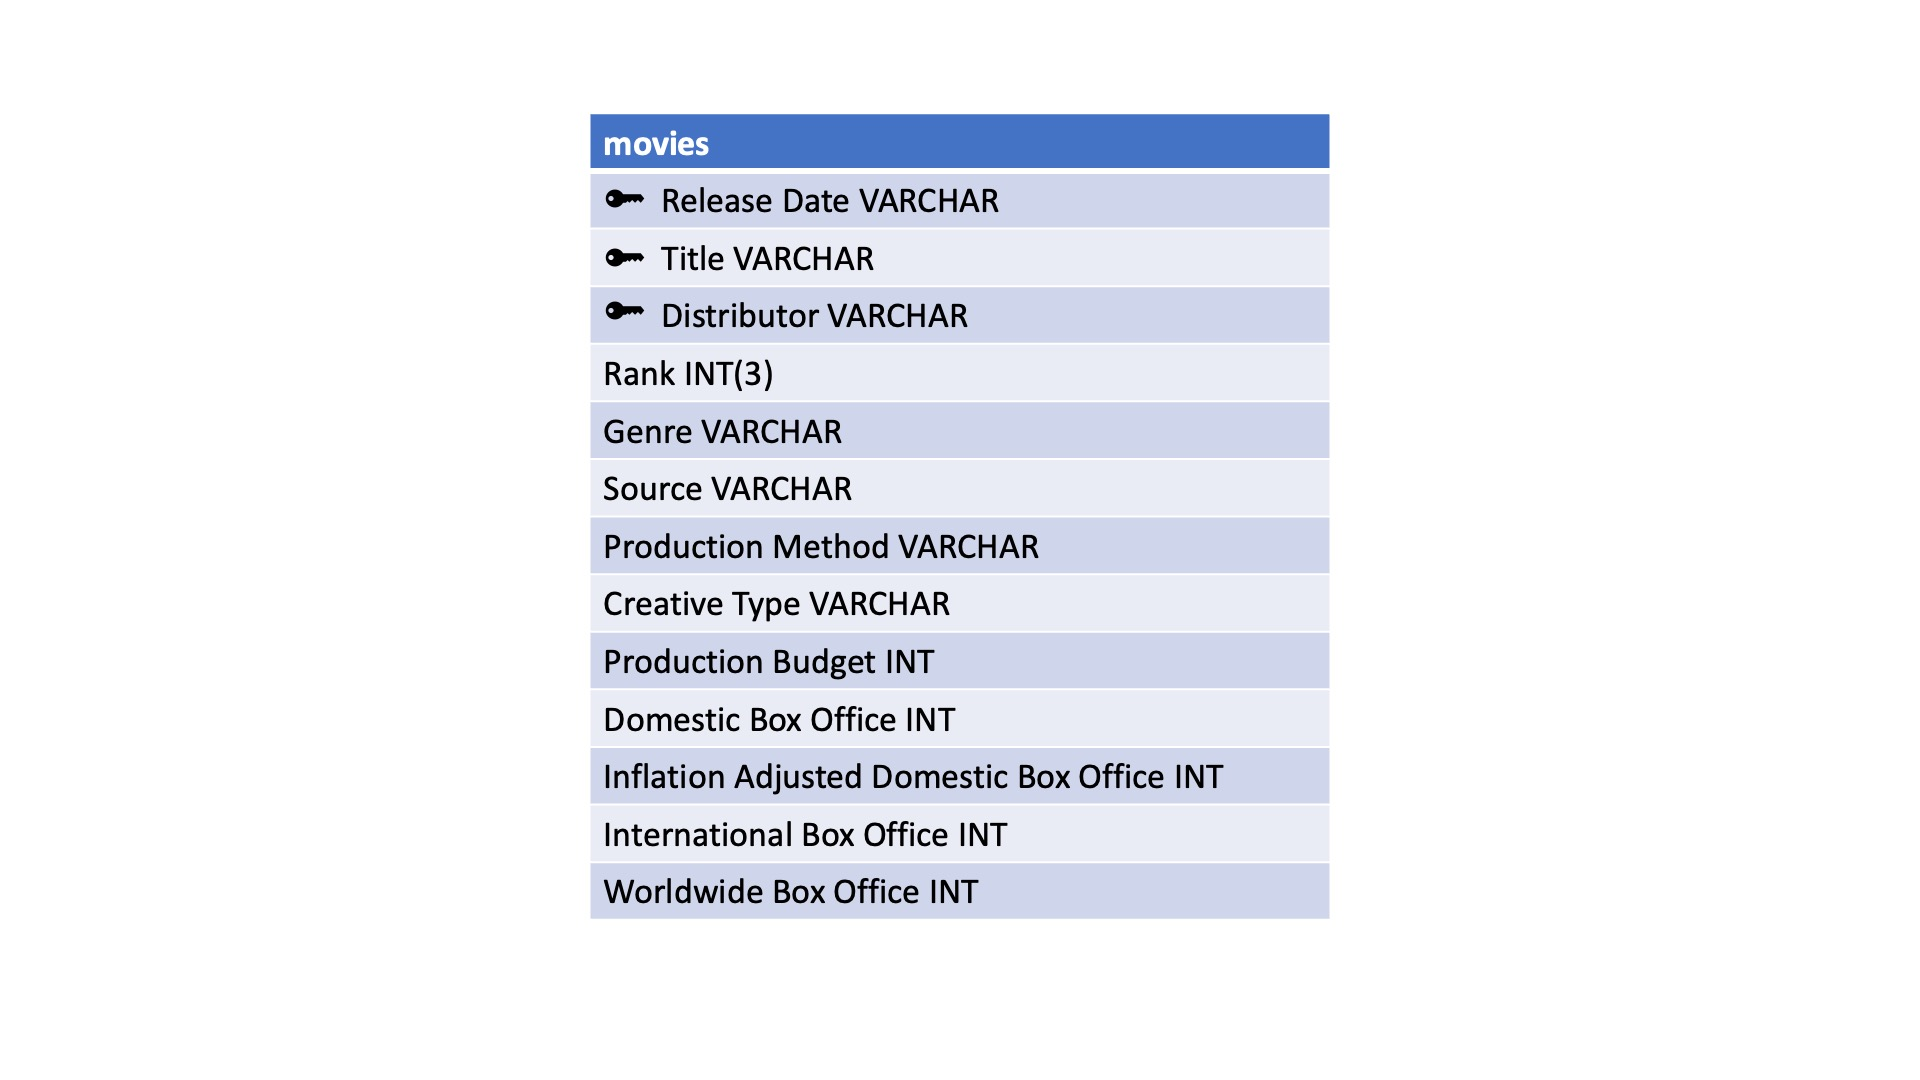

In [28]:
from IPython.display import Image
Image("schema.jpg", width=1920, height=1080)

The database schema can be seen in the figure above. <br>

<b> How the database adheres to principles of good DB design: </b>


I just have one entity called movies. The primary keys(composite key) to uniquely identify a row in the database are a combination of Release Date, Title, and Distributor. 

This is the functional dependency of the database:

<b>movies table:</b> <br>
Release Date, Title, Distributor -> Rank, Source, Production Method, Creative Type, Production Budget, Domestic Box Office, Inflation Adjusted Domestic Box Office, International Box Office, Worldwide Box Office

With this, I have ensured the first principle of determining and designing tables.

The database has no NULL or N/A values. The following shows the table-field design:

<b> movies table: </b> <br>
 
<b>Rank:</b><br>
Data Type: int(3)

NO NULL

Example values:
1,5,100,56

<b>Release Date:</b><br>
Data Type: varchar

NO NULL

Example values:
January 1, 2020 <br>
April 27, 2003 <br>
December 31, 2020 

<b>Title:</b><br>
Data Type: varchar

NO NULL

Example values:
Parasite, Inception, Interstellar, The Dark Knight, The Curious Case of Benjamin Button

<b>Distributor:</b><br>
Data Type: varchar

NO NULL

Example values:
Walt Disney, Warner Bros., Universal, Paramount

<b>Genre:</b><br>
Data Type: varchar

NO NULL

Example values:
Adventure, Comedy, Thriller/Suspense, Horror, Romantic Comedy, Multiple Genres

<b>Source:</b><br>
Data Type: varchar

NO NULL

Example values:
Original Screenplay, Based on Fiction Book/Short Story, Based on Comic/Graphic Novel, Remake, Based on Real Life Events

<b>Production Method:</b><br>
Data Type: varchar

NO NULL

Example values:

Live Action<br>
Animation/Live Action<br>
Digital Animation<br>
Hand Animation<br>
Stop-Motion Animation<br>
Multiple Production Methods<br>
Rotoscoping<br>

<b>Creative Type:</b><br>
Data Type: varchar

NO NULL

Example values:

Contemporary Fiction<br>
Kids Fiction<br>
Science Fiction<br>
Super Hero<br>
Fantasy<br>
Historical Fiction<br>
Dramatization<br>
Factual<br>
Multiple Creative Types<br>

<b>Production Budget:</b><br>
Data Type: int

Can be 0 if data not available

Example values:
300000, 100000, 500500

<b>Domestic Box Office: </b><br>
Data Type: int

Can be 0 if data not available

Example values:
800000, 180000, 600000

<b>Inflation Adjusted Domestic Box Office:</b><br>
Data Type: int

Can be 0 if data not available

Example values:
270000, 188000, 430000

<b>International Box Office: </b><br>
Data Type: int

Can be 0 if data not available

Example values:
200000, 190000, 620000

<b>Worldwide Box Office: </b><br>
Data Type: int

Can be 0 if data not available

Example values:
900000, 120000,1600000

Since I have specified appropriate constraints for all the variables, the column fields are refined and obey the sound DB principle no. 2.

The 3rd principle says that:

Establishing relationships between the tables based on the needs and anticipated uses of the database. This step can also derive additional tables and/or fields for the database.

In my case, since I have only one table, there is no need to worry about any table relationships.

<b>So, this is how the database adheres to principles of sound DB design.